Milestone 5: Brandon Mather DSC540-T302

In [151]:
import pandas as pd
import requests
import json
import sqlite3
import re
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

*Milestone 2:

In [85]:
#Downloading CSV
data = pd.read_csv('Play by Play data.2022.csv')

In [86]:
#1 Getting rid of columns that aren't needed for goal of project
to_drop = ['GameDate',
           'Quarter',
           'Minute',
           'Second',
           'YardLine',
           'NextScore',
           'Description',
           'SeasonYear',
           'Yards',
           'Formation',
           'IsRush',
           'IsPass',
           'IsIncomplete',
           'IsTouchdown',
           'PassType',
           'IsSack',
           'IsChallenge',
           'IsChallengeReversed',
           'Challenger',
           'IsMeasurement',
           'IsInterception',
           'YardLineDirection',
           'IsFumble',
           'IsPenalty',
           'RushDirection',
           'YardLineFixed',
           'IsPenaltyAccepted',
           'IsNoPlay',
           'Unnamed: 10',
           'Unnamed: 12',
           'Unnamed: 16',
           'Unnamed: 17',
           'GameId']

data.drop(to_drop, inplace=True, axis=1) 

In [87]:
#2 Getting rid of Playtypes that would have no significance on statistics
data.drop(data[data['PlayType'] == 'NO PLAY'].index, inplace = True)
data.drop(data[data['PlayType'] == 'QB KNEEL'].index, inplace = True)
data.drop(data[data['PlayType'] == 'EXCEPTION'].index, inplace = True)
data.drop(data[data['PlayType'] == 'CLOCK STOP'].index, inplace = True)

In [88]:
#3 getting rid of of NaN rows that aren't needed
data2=data.dropna(subset=['OffenseTeam', 'DefenseTeam', 'PlayType'])

In [89]:
#4 Renaming columns with possible confusing names
data2.rename(columns={'ToGo': 'YardsTillFirstDown', 'TeamWin': 'Win'})

,OffenseTeam,DefenseTeam,Down,YardsTillFirstDown,SeriesFirstDown,Win,PlayType,IsTwoPointConversion,IsTwoPointConversionSuccessful,PenaltyTeam,PenaltyType,PenaltyYards
2,SF,CHI,2,6,1,0,RUSH,0,0,NaN,NaN,0
4,CHI,SF,1,10,0,0,RUSH,0,0,NaN,NaN,0
6,CHI,SF,2,7,0,0,RUSH,0,0,NaN,NaN,0
10,CAR,CLE,3,11,0,0,RUSH,0,0,NaN,NaN,0
12,CAR,CLE,4,12,0,0,FIELD GOAL,0,0,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
38593,CLE,CAR,1,10,0,0,RUSH,0,0,CLE,OFFENSIVE HOLDING,10
38594,CAR,CLE,4,14,0,0,PUNT,0,0,NaN,NaN,0
38595,CAR,CLE,1,10,0,0,RUSH,0,0,NaN,NaN,0
38596,BUF,LA,2,10,0,0,RUSH,0,0,NaN,NaN,0


In [90]:
#5 Replacing any remaining NaN that need to stay to 0
data2.fillna(0)

,OffenseTeam,DefenseTeam,Down,ToGo,SeriesFirstDown,TeamWin,PlayType,IsTwoPointConversion,IsTwoPointConversionSuccessful,PenaltyTeam,PenaltyType,PenaltyYards
2,SF,CHI,2,6,1,0,RUSH,0,0,0,0,0
4,CHI,SF,1,10,0,0,RUSH,0,0,0,0,0
6,CHI,SF,2,7,0,0,RUSH,0,0,0,0,0
10,CAR,CLE,3,11,0,0,RUSH,0,0,0,0,0
12,CAR,CLE,4,12,0,0,FIELD GOAL,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
38593,CLE,CAR,1,10,0,0,RUSH,0,0,CLE,OFFENSIVE HOLDING,10
38594,CAR,CLE,4,14,0,0,PUNT,0,0,0,0,0
38595,CAR,CLE,1,10,0,0,RUSH,0,0,0,0,0
38596,BUF,LA,2,10,0,0,RUSH,0,0,0,0,0


In [91]:
data2

,OffenseTeam,DefenseTeam,Down,ToGo,SeriesFirstDown,TeamWin,PlayType,IsTwoPointConversion,IsTwoPointConversionSuccessful,PenaltyTeam,PenaltyType,PenaltyYards
2,SF,CHI,2,6,1,0,RUSH,0,0,NaN,NaN,0
4,CHI,SF,1,10,0,0,RUSH,0,0,NaN,NaN,0
6,CHI,SF,2,7,0,0,RUSH,0,0,NaN,NaN,0
10,CAR,CLE,3,11,0,0,RUSH,0,0,NaN,NaN,0
12,CAR,CLE,4,12,0,0,FIELD GOAL,0,0,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
38593,CLE,CAR,1,10,0,0,RUSH,0,0,CLE,OFFENSIVE HOLDING,10
38594,CAR,CLE,4,14,0,0,PUNT,0,0,NaN,NaN,0
38595,CAR,CLE,1,10,0,0,RUSH,0,0,NaN,NaN,0
38596,BUF,LA,2,10,0,0,RUSH,0,0,NaN,NaN,0


*Milestone 3:

In [10]:
defense_qb = pd.read_html('https://www.pro-football-reference.com/years/2022/fantasy-points-against-QB.htm#fantasy_def')[0]

In [11]:
#1 Getting rid of top indexes
defense_qb.columns = defense_qb.columns.droplevel()

In [12]:
#2 Getting rid of columns that aren't needed for goal of project
defense_qb = defense_qb.drop(['FantPt', 'DKPt', 'FDPt'], axis=1)

In [122]:
#3 Renaming columns from abreviations to words
defense_qb.columns = ['name','Games','Passing Completions','Passing Attempts','Passing Yards Allowed','Passing Touchdowns',
                   'Interceptions','Two Point Conversions','Sacks', 'Rushing Attempts', 'Rushing Yards Allowed', 'Rushing Touchdowns']

In [102]:
#4 Filling NaN's to 0's
defense_qb.fillna(0)

,name,Games,Passing Completions,Passing Attempts,Passing Yards,Passing Touchdowns,Interceptions,Two Point Conversions,Sacks,Rushing Attempts,Rushing Yards,Rushing Touchdowns
0,Detroit Lions,17,353,560,4446,26,12,2.0,38,100,700,7
1,Miami Dolphins,17,415,623,4259,27,8,2.0,40,88,525,3
2,Kansas City Chiefs,17,407,617,4138,33,11,1.0,55,94,444,4
3,Tennessee Titans,17,438,669,4931,29,14,2.0,39,67,217,3
4,Las Vegas Raiders,17,398,589,4319,25,6,2.0,27,60,269,4
5,Chicago Bears,17,322,479,3817,22,14,3.0,20,102,379,9
6,Minnesota Vikings,17,408,616,4756,23,15,2.0,38,62,342,4
7,Indianapolis Colts,17,365,535,3836,25,10,4.0,44,80,351,6
8,Jacksonville Jaguars,17,385,601,4258,25,14,3.0,35,92,469,2
9,Arizona Cardinals,17,412,591,4133,29,11,1.0,36,75,271,3


In [15]:
#5 Making sure no rows are duplicated
duplicate = defense_qb[defense_qb.duplicated()]

In [103]:
defense_qb['name'] = defense_qb['name'].replace(['Cincinnati Bengals', 'Detroit Lions', 'Washington Commanders', 'New York Giants', 'Arizona Cardinals',
                                                   'Carolina Panthers', 'Los Angeles Chargers', 'Miami Dolphins', 'Cleveland Browns',
                                                   'Jacksonville Jaguars', 'Atlanta Falcons', 'Denver Broncos', 'Indianapolis Colts',
                                                   'Las Vegas Raiders', 'New York Jets', 'Tampa Bay Buccaneers', 'Chicago Bears',
                                                   'Dallas Cowboys', 'Pittsburgh Steelers', 'Los Angeles Rams', 'Philadelphia Eagles',
                                                   'Tennessee Titans', 'Buffalo Bills', 'Houston Texans', 'Minnesota Vikings', 'Seattle Seahawks',
                                                   'Kansas City Chiefs', 'New England Patriots', 'Green Bay Packers', 'New Orleans Saints',
                                                   'San Francisco 49ers', 'Baltimore Ravens'], ['Bengals', 'Lions', 'Commanders', 'Giants', 'Cardinals',
                                                   'Panthers', 'Chargers', 'Dolphins', 'Browns',
                                                   'Jaguars', 'Falcons', 'Broncos', 'Colts',
                                                   'Raiders', 'Jets', 'Buccaneers', 'Bears',
                                                   'Cowboys', 'Steelers', 'Rams', 'Eagles',
                                                   'Titans', 'Bills', 'Texans','Vikings', 'Seahawks',
                                                   'Chiefs', 'Patriots', 'Packers', 'Saints',
                                                   '49ers', 'Ravens'])

In [123]:
defense_qb

,name,Games,Passing Completions,Passing Attempts,Passing Yards Allowed,Passing Touchdowns,Interceptions,Two Point Conversions,Sacks,Rushing Attempts,Rushing Yards Allowed,Rushing Touchdowns
0,Lions,17,353,560,4446,26,12,2.0,38,100,700,7
1,Dolphins,17,415,623,4259,27,8,2.0,40,88,525,3
2,Chiefs,17,407,617,4138,33,11,1.0,55,94,444,4
3,Titans,17,438,669,4931,29,14,2.0,39,67,217,3
4,Raiders,17,398,589,4319,25,6,2.0,27,60,269,4
5,Bears,17,322,479,3817,22,14,3.0,20,102,379,9
6,Vikings,17,408,616,4756,23,15,2.0,38,62,342,4
7,Colts,17,365,535,3836,25,10,4.0,44,80,351,6
8,Jaguars,17,385,601,4258,25,14,3.0,35,92,469,2
9,Cardinals,17,412,591,4133,29,11,1.0,36,75,271,3


*Milestone 4:

In [54]:
#connecting to API
url = "https://nfl-team-stats.p.rapidapi.com/v1/nfl-stats/teams/receiving-stats/offense/2019"

headers = {
	"X-RapidAPI-Key": "5f74606fe1msh15446d3536f515ap118208jsn1cbab3825b4e",
	"X-RapidAPI-Host": "nfl-team-stats.p.rapidapi.com"
}

response = requests.request("GET", url, headers=headers)

In [55]:
json = response.json()

In [56]:
#1 turning API data into dataframe
df = pd.DataFrame(json['_embedded'])

In [57]:
#2 Seperating columns
recieving_df = df["teamReceivingStatsList"].apply(pd.Series)

In [58]:
#3 # Renaming Columns to show they are recieving stats
recieving_df = recieving_df.rename(columns = {'receives': 'Receptions', 'touchdowns': 'Recieving TDs', 'yards': 'Recieving yards'})

In [22]:
#second API data into dataframe
url2 = "https://nfl-team-stats.p.rapidapi.com/v1/nfl-stats/teams/rushing-stats/defense/2019"

headers2 = {
	"X-RapidAPI-Key": "5f74606fe1msh15446d3536f515ap118208jsn1cbab3825b4e",
	"X-RapidAPI-Host": "nfl-team-stats.p.rapidapi.com"
}

response2 = requests.request("GET", url2, headers=headers2)

In [23]:
json2 = response2.json()

In [24]:
df2 = pd.DataFrame(json2['_embedded'])

In [25]:
#4 Seperating Columns
rushing_df = df2["teamRushingStatsList"].apply(pd.Series)

In [26]:
#5 Renaming Columns to show they are rushing stats
rushing_df = rushing_df.rename(columns = {'yards': 'Rushing yards', 'touchdowns': 'Rushing TDs'})

In [27]:
# third API dat into dataframe
url3 = "https://nfl-team-stats.p.rapidapi.com/v1/nfl-stats/teams/win-stats/2019"

headers3 = {
	"X-RapidAPI-Key": "5f74606fe1msh15446d3536f515ap118208jsn1cbab3825b4e",
	"X-RapidAPI-Host": "nfl-team-stats.p.rapidapi.com"
}

response3 = requests.request("GET", url3, headers=headers3)

In [28]:
json3 = response3.json()

In [29]:
df3 = pd.DataFrame(json3['_embedded'])

In [30]:
#6 Seperating Columns
teamwins_df = df3["teamWinStatsList"].apply(pd.Series)

In [ ]:
teamwins_df['name'] = teamwins_df['name'].replace(['Cincinnati Bengals', 'Detroit Lions', 'Washington Commanders', 'New York Giants', 'Arizona Cardinals',
                                                   'Carolina Panthers', 'Los Angeles Chargers', 'Miami Dolphins', 'Cleveland Browns',
                                                   'Jacksonville Jaguars', 'Atlanta Falcons', 'Denver Broncos', 'Indianapolis Colts',
                                                   'Las Vegas Raiders', 'New York Jets', 'Tampa Bay Buccaneers', 'Chicago Bears',
                                                   'Dallas Cowboys', 'Pittsburgh Steelers', 'Los Angeles Rams', 'Philadelphia Eagles xz',
                                                   'Tennessee Titans x', 'Buffalo Bills x', 'Houston Texans xz', 'Minnesota Vikings x', 'Seattle Seahawks',
                                                   'Kansas City Chiefs xz', 'New England Patriots xz', 'Green Bay Packers xz', 'New Orleans Saints xz',
                                                   'San Francisco 49ers x*', 'Baltimore Ravens xz*'], ['Bengals', 'Lions', 'Commanders', 'Giants', 'Cardinals',
                                                   'Panthers', 'Chargers', 'Dolphins', 'Browns',
                                                   'Jaguars', 'Falcons', 'Broncos', 'Colts',
                                                   'Raiders', 'Jets', 'Buccaneers', 'Bears',
                                                   'Cowboys', 'Steelers', 'Rams', 'Eagles',
                                                   'Titans', 'Bills', 'Texans','Vikings', 'Seahawks',
                                                   'Chiefs', 'Patriots', 'Packers', 'Saints',
                                                   '49ers', 'Ravens'])

In [63]:
recieving_df['_links'] = recieving_df['_links'].str.replace('http\S+|www.\S+', '', case=False)

C:\Users\brand\AppData\Local\Temp\ipykernel_6116\137257117.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  recieving_df['_links'] = recieving_df['_links'].str.replace('http\S+|www.\S+', '', case=False)


In [96]:
rushing_df['_links'] = rushing_df['_links'].str.replace('http\S+|www.\S+', '', case=False)

C:\Users\brand\AppData\Local\Temp\ipykernel_6116\799990838.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  rushing_df['_links'] = rushing_df['_links'].str.replace('http\S+|www.\S+', '', case=False)


In [97]:
teamwins_df['_links'] = teamwins_df['_links'].str.replace('http\S+|www.\S+', '', case=False)

C:\Users\brand\AppData\Local\Temp\ipykernel_6116\1750766928.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  teamwins_df['_links'] = teamwins_df['_links'].str.replace('http\S+|www.\S+', '', case=False)


In [98]:
recieving_df

,name,Receptions,Recieving TDs,Recieving yards,_links
0,Falcons,459,29,5049,NaN
1,Saints,418,36,4431,NaN
2,Rams,397,22,4669,NaN
3,Chargers,394,24,4648,NaN
4,Eagles,391,27,4063,NaN
5,Cowboys,388,30,4902,NaN
6,Panthers,382,17,4134,NaN
7,Buccaneers,382,33,5127,NaN
8,Chiefs,378,30,4690,NaN
9,Patriots,378,25,4153,NaN


In [99]:
rushing_df

,name,Rushing yards,Rushing TDs,_links
0,Ravens,1494,12,NaN
1,49ers,1802,11,NaN
2,Seahawks,1883,22,NaN
3,Vikings,1728,8,NaN
4,Colts,1567,8,NaN
5,Bills,1649,12,NaN
6,Eagles,1442,13,NaN
7,Cowboys,1656,14,NaN
8,Patriots,1528,7,NaN
9,Titans,1672,14,NaN


In [100]:
teamwins_df

,name,wins,losses,winRatePercentage,_links
0,Bengals,2,14,0.125,NaN
1,Lions,3,12,0.219,NaN
2,Commanders,3,13,0.188,NaN
3,Giants,4,12,0.250,NaN
4,Cardinals,5,10,0.344,NaN
5,Panthers,5,11,0.313,NaN
6,Chargers,5,11,0.313,NaN
7,Dolphins,5,11,0.313,NaN
8,Browns,6,10,0.375,NaN
9,Jaguars,6,10,0.375,NaN


******MILESTONE 5 START

In [118]:
#Putting Tables in sqlite
conn = sqlite3.connect('mydb.sqlite')

In [ ]:
data2.to_sql(name='Play by Play', con=conn)
conn.commit()

In [42]:
defense_qb.to_sql(name='Defensive Stats', con=conn)
conn.commit()

In [ ]:
recieving_df.to_sql(name='Recieving Stats', con=conn)
conn.commit()

In [ ]:
rushing_df.to_sql(name='Rushing Stats', con=conn)
conn.commit()

In [ ]:
teamwins_df.to_sql(name='Team Wins', con=conn)
conn.commit()

In [82]:
conn.close()

In [124]:
#Merging datasets
merge_df = pd.merge(defense_qb, recieving_df, on = 'name')

In [125]:
merge_df2 = pd.merge(merge_df, rushing_df, on = 'name')

In [126]:
final_merge = pd.merge(merge_df2, teamwins_df, on ='name')

In [127]:
final_merge.fillna(0)

,name,Games,Passing Completions,Passing Attempts,Passing Yards Allowed,Passing Touchdowns,Interceptions,Two Point Conversions,Sacks,Rushing Attempts,...,Recieving TDs,Recieving yards,_links_x,Rushing yards,Rushing TDs,_links_y,wins,losses,winRatePercentage,_links
0,Lions,17,353,560,4446,26,12,2.0,38,100,...,28,4187,0.0,1855,13,0.0,3,12,0.219,0.0
1,Dolphins,17,415,623,4259,27,8,2.0,40,88,...,22,4117,0.0,2166,15,0.0,5,11,0.313,0.0
2,Chiefs,17,407,617,4138,33,11,1.0,55,94,...,30,4690,0.0,2051,14,0.0,12,4,0.750,0.0
3,Titans,17,438,669,4931,29,14,2.0,39,67,...,29,3956,0.0,1672,14,0.0,9,7,0.563,0.0
4,Raiders,17,398,589,4319,25,6,2.0,27,60,...,22,4110,0.0,1570,15,0.0,7,9,0.438,0.0
5,Bears,17,322,479,3817,22,14,3.0,20,102,...,20,3573,0.0,1632,16,0.0,8,8,0.500,0.0
6,Vikings,17,408,616,4756,23,15,2.0,38,62,...,26,3729,0.0,1728,8,0.0,10,6,0.625,0.0
7,Colts,17,365,535,3836,25,10,4.0,44,80,...,22,3314,0.0,1567,8,0.0,7,9,0.438,0.0
8,Jaguars,17,385,601,4258,25,14,3.0,35,92,...,24,4023,0.0,2229,23,0.0,6,10,0.375,0.0
9,Cardinals,17,412,591,4133,29,11,1.0,36,75,...,20,3797,0.0,1922,9,0.0,5,10,0.344,0.0


In [128]:
Full_df = pd.concat([data2, final_merge])

In [ ]:
Full_df.to_sql(name='Full NFL data', con=conn)
conn.commit()
conn.close()

Visualizations

In [141]:
#Scatter plot showing comparison between Passing Yards allowed and Win Rate
passingyards_winrate = Full_df[["name", "Passing Yards Allowed", "winRatePercentage"]]

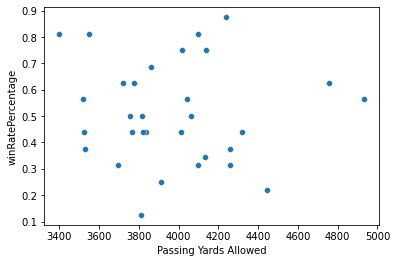

In [164]:
scatterplot_passing_winrate = sns.scatterplot(data=passingyards_winrate, x="Passing Yards Allowed", y="winRatePercentage",)

In [146]:
#Scatter plot showing comparison between Rushing Yards allowed and Win Rate
rushingyards_winrate = Full_df[["name", "Rushing Yards Allowed", "winRatePercentage"]]

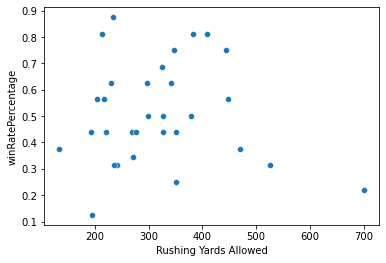

In [163]:
scatterplot_rushing_winrate = sns.scatterplot(data=rushingyards_winrate, x="Rushing Yards Allowed", y="winRatePercentage")

In [157]:
#Bar Graph showing comparison between number of sacks and interceptions
interceptions_sacks = Full_df[["name", "Interceptions", "Sacks"]]

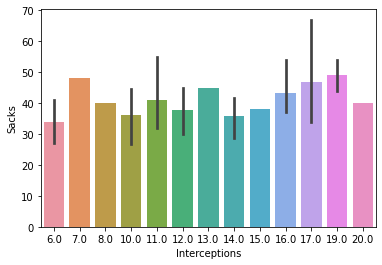

In [162]:
bar_interceptions_sacks = sns.barplot(data=interceptions_sacks, x="Interceptions", y="Sacks")

In [171]:
#line plots comparing passing td's and rushing td's to wins
passingtds_wins = Full_df[["name", "Recieving TDs", "wins"]]

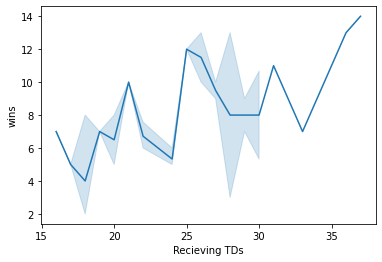

In [172]:
line_passingtds_wins = sns.lineplot(data=passingtds_wins, x="Recieving TDs", y="wins")

In [169]:
rushingtds_wins = Full_df[["name", "Rushing TDs", "wins"]]

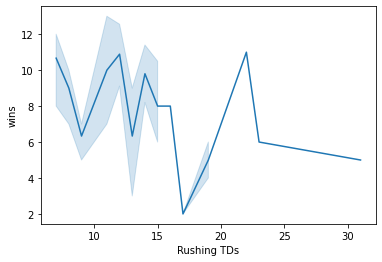

In [170]:
line_rushingtds_wins = sns.lineplot(data=rushingtds_wins, x="Rushing TDs", y="wins")